In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Big_data=pd.read_csv("Big_data_train.csv")
Big_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Here in this dataset the target variable is continuous so we will use the Regression method

In [3]:
Big_data.shape

(8523, 12)

This DataFrame is having 8523 rows and 12 columns

In [4]:
Big_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
Big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight has 1463 null values and Outlet_Size has 2410 null value

In [6]:
Big_data.loc[Big_data["Item_Outlet_Sales"]== " "]  #checking for null values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There is no null value in target column

In [7]:
Big_data["Item_Weight"]=Big_data["Item_Weight"].fillna(np.mean(Big_data["Item_Weight"]))

In [8]:
Big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
Big_data['Outlet_Size']=imp.fit_transform(Big_data['Outlet_Size'].values.reshape(-1,1))
Big_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
Big_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [183]:
Big_data.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

### Making DataFrame for Nominal Data

In [12]:
Big_data_nominal=Big_data[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']].copy()

In [13]:
Big_data_nominal.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## Univariate Analysis

## Vizualization of the data :


For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


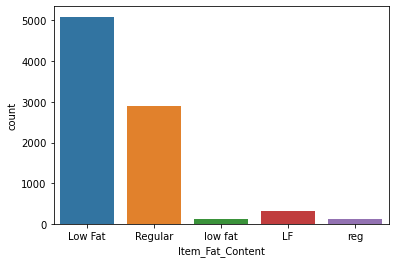

In [14]:
ax=sns.countplot(x="Item_Fat_Content", data=Big_data_nominal)
print(Big_data_nominal["Item_Fat_Content"].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


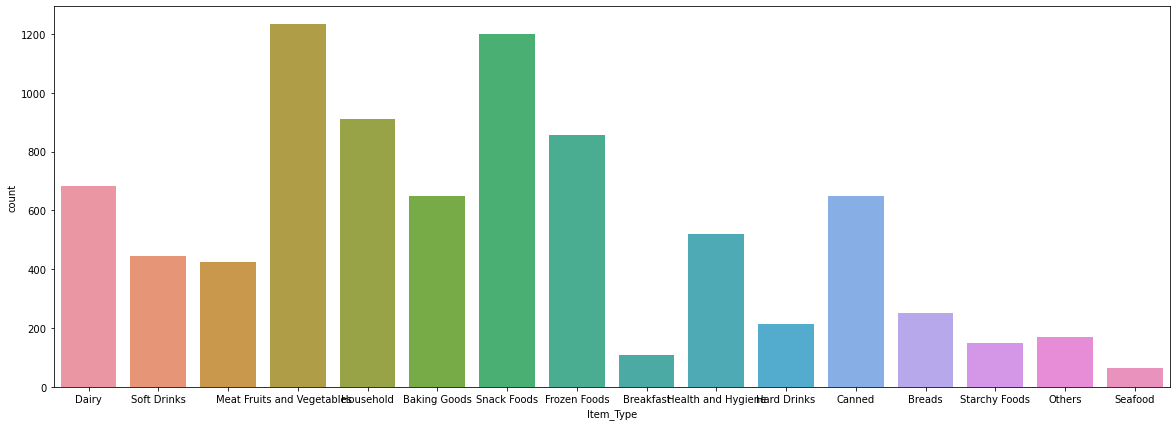

In [15]:
countplt,ax=plt.subplots(figsize=(20,7))
ax=sns.countplot(x="Item_Type", data=Big_data_nominal)
print(Big_data_nominal["Item_Type"].value_counts())

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


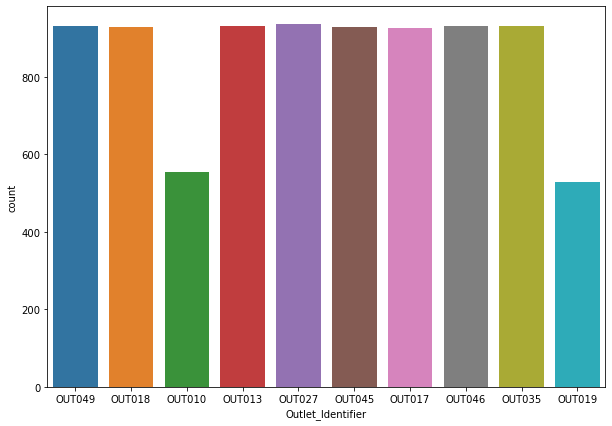

In [16]:
countplt,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x="Outlet_Identifier", data=Big_data_nominal)
print(Big_data_nominal["Outlet_Identifier"].value_counts())

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


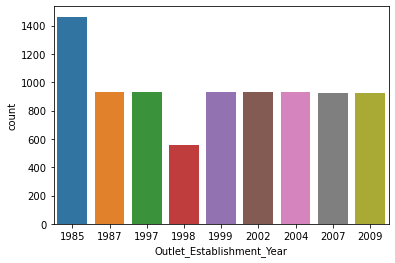

In [17]:
ax=sns.countplot(x="Outlet_Establishment_Year", data=Big_data_nominal)
print(Big_data_nominal["Outlet_Establishment_Year"].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


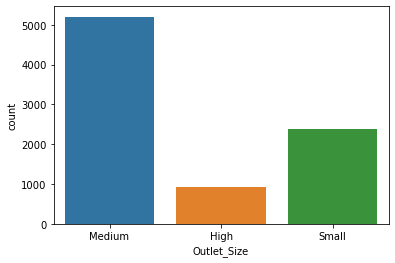

In [18]:
ax=sns.countplot(x="Outlet_Size", data=Big_data_nominal)
print(Big_data_nominal["Outlet_Size"].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


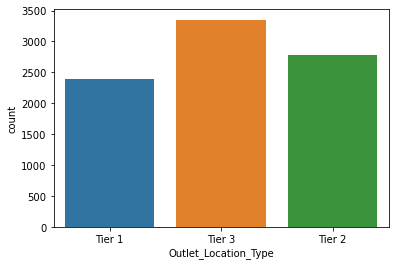

In [19]:
ax=sns.countplot(x="Outlet_Location_Type", data=Big_data_nominal)
print(Big_data_nominal["Outlet_Location_Type"].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


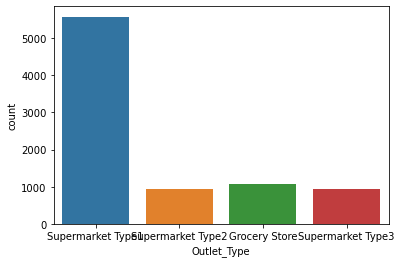

In [20]:
ax=sns.countplot(x="Outlet_Type", data=Big_data_nominal)
print(Big_data_nominal["Outlet_Type"].value_counts())

## Label Encoding String Data

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [22]:
for i in Big_data.columns:
    if Big_data[i].dtypes=="object":
        Big_data[i]=enc.fit_transform(Big_data[i].values.reshape(-1,1))

In [23]:
Big_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


### Checking the distribution of the continous value or the float type columns 

In [24]:
Big_data_continuous=Big_data[["Item_Identifier","Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]].copy()

In [25]:
Big_data_continuous.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

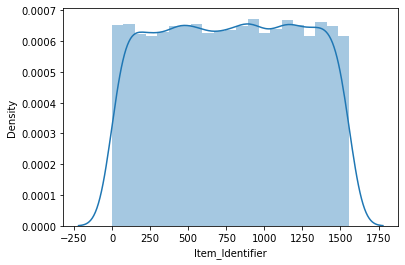

In [26]:
sns.distplot(Big_data_continuous['Item_Identifier'],kde=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

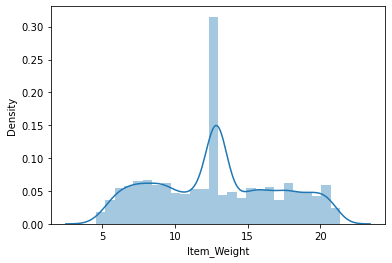

In [27]:
sns.distplot(Big_data_continuous['Item_Weight'],kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

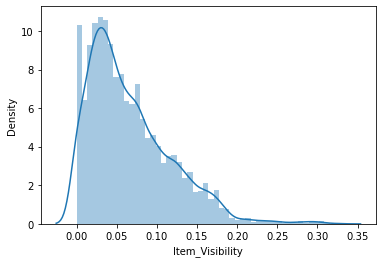

In [28]:
sns.distplot(Big_data_continuous['Item_Visibility'],kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

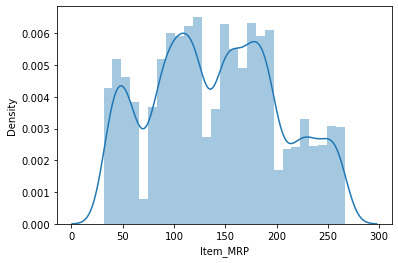

In [29]:
sns.distplot(Big_data_continuous['Item_MRP'],kde=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

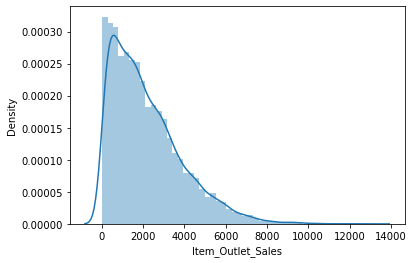

In [30]:
sns.distplot(Big_data_continuous['Item_Outlet_Sales'],kde=True)

### Bivariate Analysis

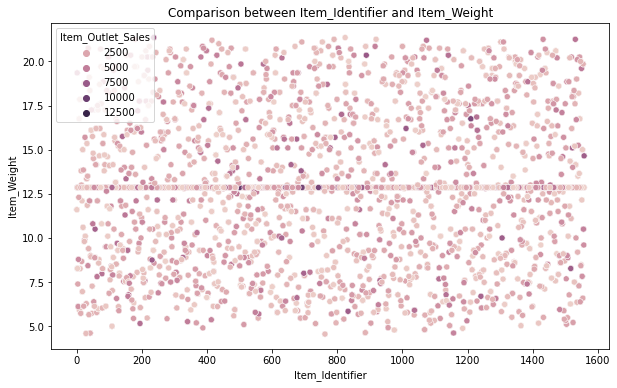

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Identifier and Item_Weight')
sns.scatterplot(Big_data['Item_Identifier'], Big_data["Item_Weight"], hue=Big_data["Item_Outlet_Sales"]);

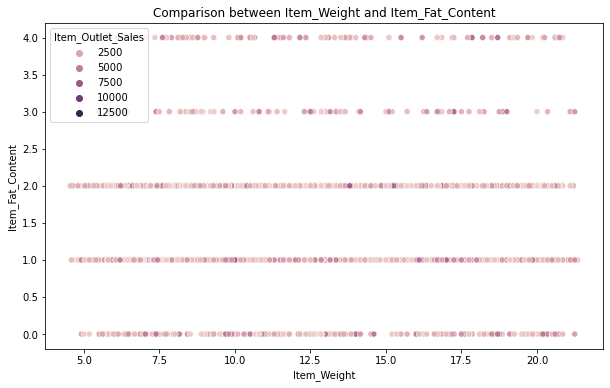

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Weight and Item_Fat_Content')
sns.scatterplot(Big_data['Item_Weight'], Big_data["Item_Fat_Content"], hue=Big_data["Item_Outlet_Sales"]);

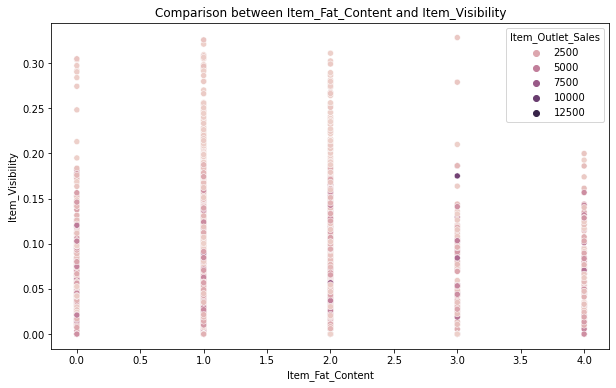

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Fat_Content and Item_Visibility')
sns.scatterplot(Big_data['Item_Fat_Content'], Big_data["Item_Visibility"], hue=Big_data["Item_Outlet_Sales"]);

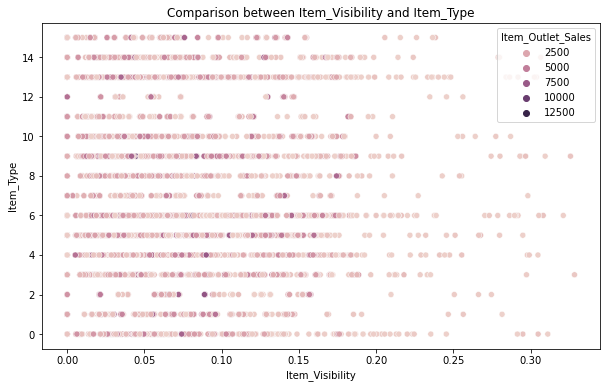

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Visibility and Item_Type')
sns.scatterplot(Big_data['Item_Visibility'], Big_data["Item_Type"], hue=Big_data["Item_Outlet_Sales"]);

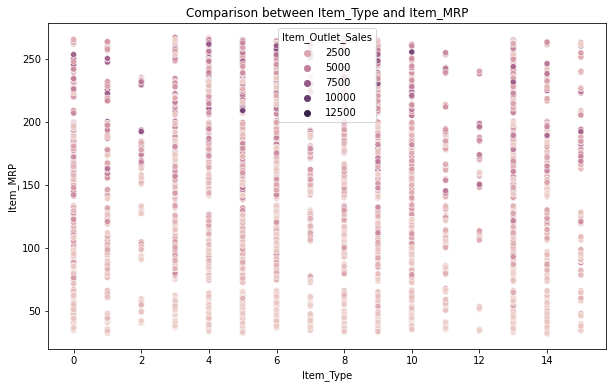

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Type and Item_MRP')
sns.scatterplot(Big_data['Item_Type'], Big_data["Item_MRP"], hue=Big_data["Item_Outlet_Sales"]);

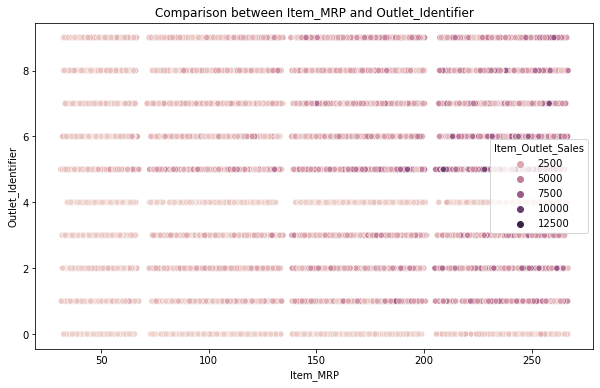

In [36]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_MRP and Outlet_Identifier')
sns.scatterplot(Big_data['Item_MRP'], Big_data["Outlet_Identifier"], hue=Big_data["Item_Outlet_Sales"]);

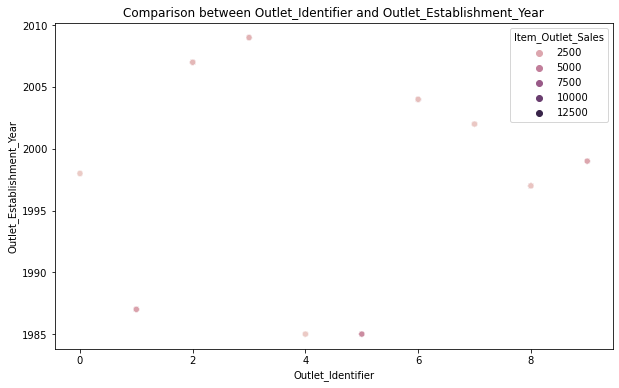

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Identifier and Outlet_Establishment_Year')
sns.scatterplot(Big_data['Outlet_Identifier'], Big_data["Outlet_Establishment_Year"], hue=Big_data["Item_Outlet_Sales"]);

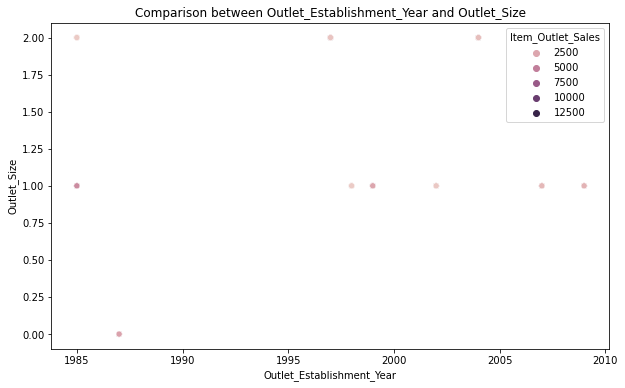

In [38]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Establishment_Year and Outlet_Size')
sns.scatterplot(Big_data['Outlet_Establishment_Year'], Big_data["Outlet_Size"], hue=Big_data["Item_Outlet_Sales"]);

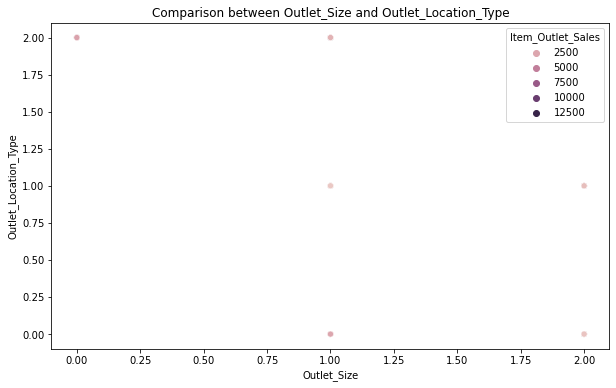

In [39]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Size and Outlet_Location_Type')
sns.scatterplot(Big_data['Outlet_Size'], Big_data["Outlet_Location_Type"], hue=Big_data["Item_Outlet_Sales"]);

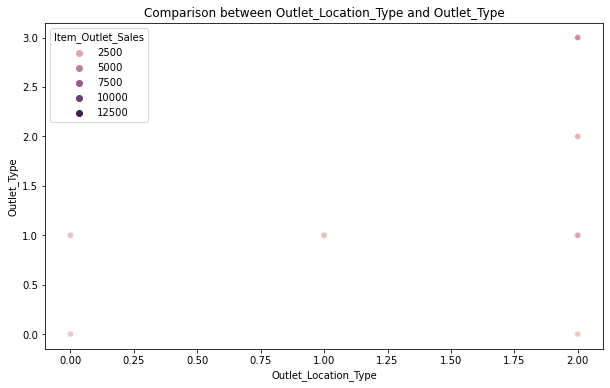

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Location_Type and Outlet_Type')
sns.scatterplot(Big_data['Outlet_Location_Type'], Big_data["Outlet_Type"], hue=Big_data["Item_Outlet_Sales"]);

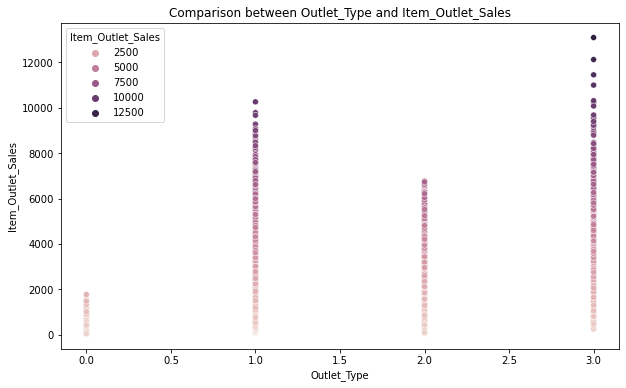

In [41]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Type and Item_Outlet_Sales')
sns.scatterplot(Big_data['Outlet_Type'], Big_data["Item_Outlet_Sales"], hue=Big_data["Item_Outlet_Sales"]);

In [42]:
Big_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

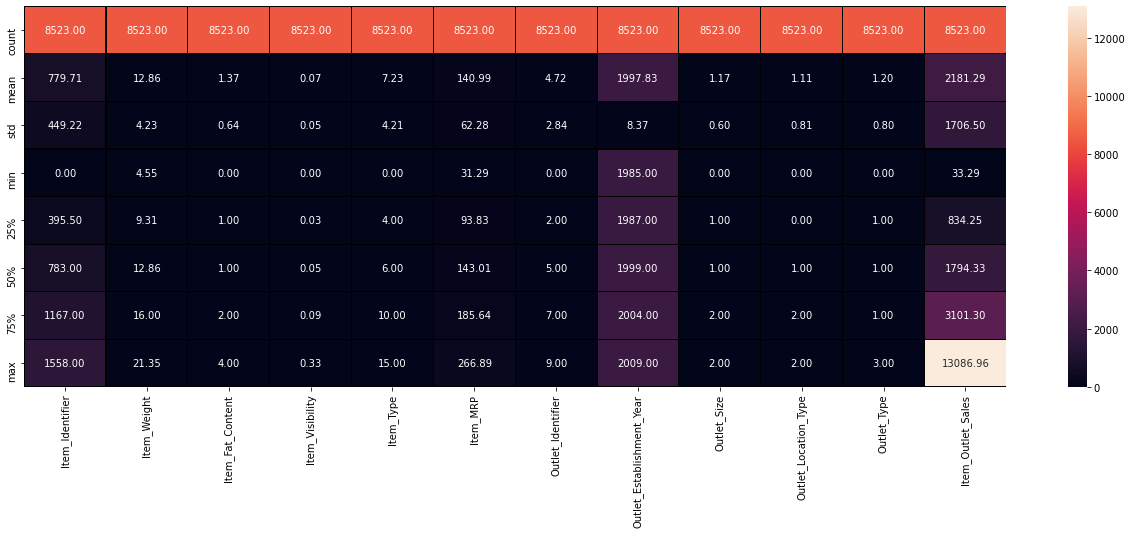

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(Big_data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

## Outliers Check

<AxesSubplot:>

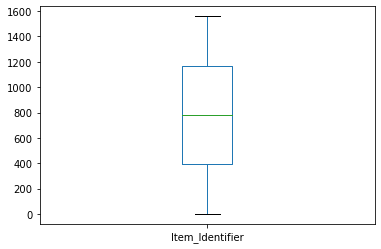

In [44]:
Big_data['Item_Identifier'].plot.box()

<AxesSubplot:>

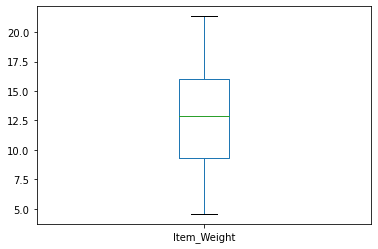

In [45]:
Big_data['Item_Weight'].plot.box()

<AxesSubplot:>

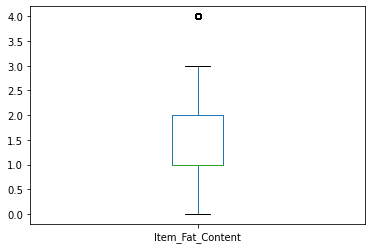

In [46]:
Big_data['Item_Fat_Content'].plot.box()

<AxesSubplot:>

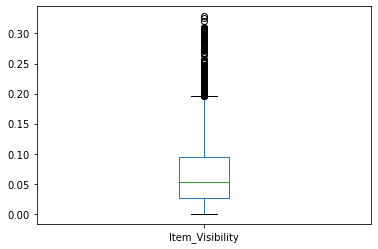

In [47]:
Big_data['Item_Visibility'].plot.box()

<AxesSubplot:>

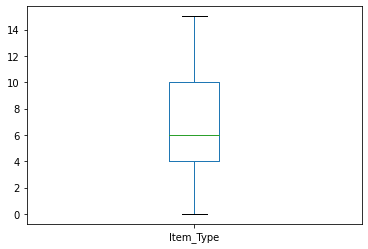

In [48]:
Big_data['Item_Type'].plot.box()

<AxesSubplot:>

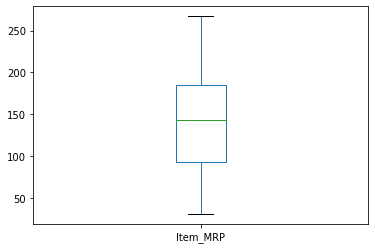

In [49]:
Big_data['Item_MRP'].plot.box()

<AxesSubplot:>

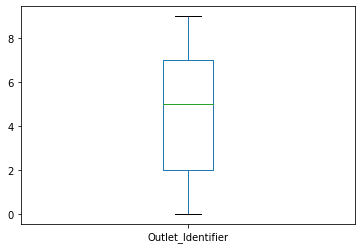

In [50]:
Big_data['Outlet_Identifier'].plot.box()

<AxesSubplot:>

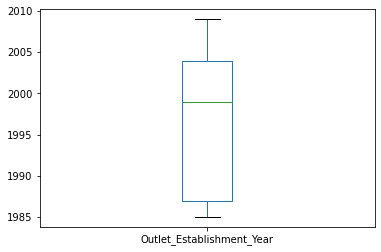

In [51]:
Big_data['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

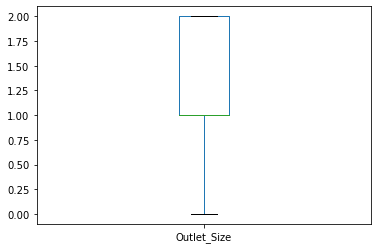

In [52]:
Big_data['Outlet_Size'].plot.box()

<AxesSubplot:>

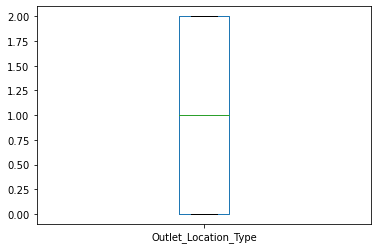

In [53]:
Big_data['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

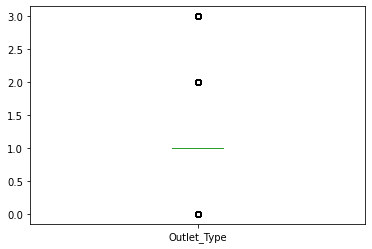

In [54]:
Big_data['Outlet_Type'].plot.box()

<AxesSubplot:>

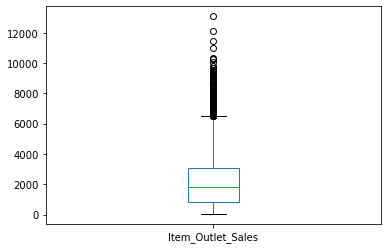

In [55]:
Big_data['Item_Outlet_Sales'].plot.box()

From the above graphs we can say that Item_Fat_Content, Item_Visibility, Outlet_Type, Item_Outlet_Sales have outliers

### Correlation of the columns with the target columns:

In [56]:
Big_data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

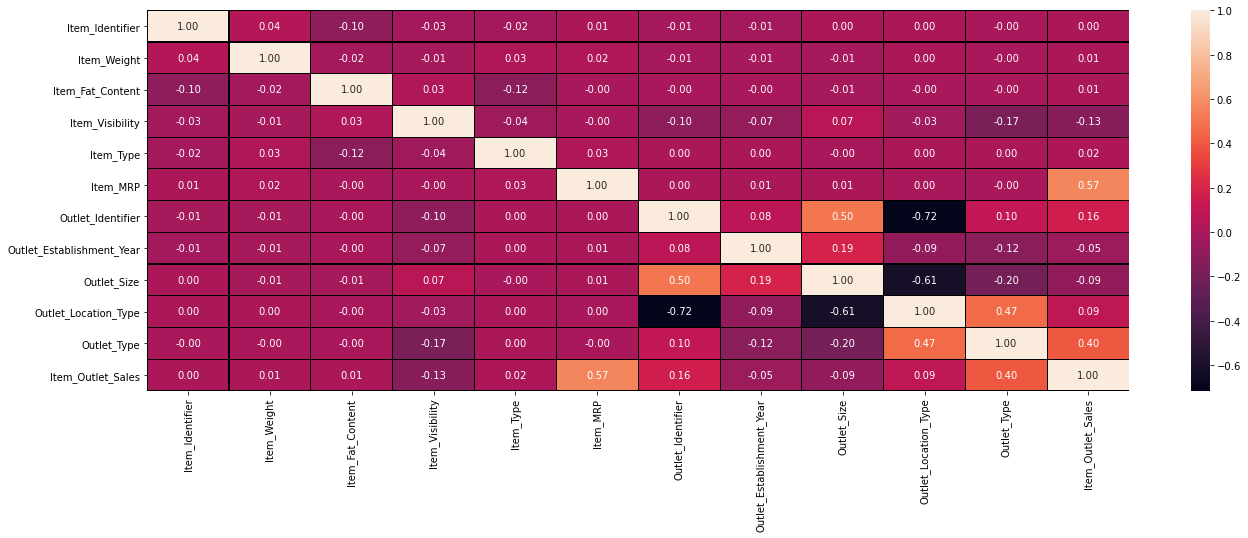

In [57]:
plt.figure(figsize=(22,7))
sns.heatmap(Big_data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

From the above heatmaps we can see that:
    
Outlet_Identifier and Outlet_Location_Type have negative correlation with value -0.72

Outlet_Size and Outlet_Location_Type have negative correlation with value -0.61

and Item_MRP and Item_Outlet_Sales have positive correlation with value 0.57

rest value are between -0.5 to +0.5

## Considering Outlier Removal

In [58]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Big_data))
threshold=3
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [59]:
Big_datanew=Big_data[(z<3).all(axis=1)]
Big_datanew

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [60]:
Big_datanew.shape

(8222, 12)

In [61]:
Big_data.shape

(8523, 12)

In [62]:
8523-8222

301

In [63]:
301/8523

0.035316203214830456

Here after removing outliers data loss is less than 5 percent, So we will use the new DataFrame

## Skewness Checking

In [64]:
Big_datanew.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

Here from the above value we can see that :
    
Item_Visibility, Outlet_Type and Item_Outlet_Sales have positive skewness 

### Skewness removal using Power_Transform method


In [65]:
x=Big_datanew.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0


In [66]:
y=Big_datanew.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [67]:
from sklearn.preprocessing import power_transform
X=power_transform(x, method='yeo-johnson')
X

array([[-1.45691592, -0.81766492, -0.55319135, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [-2.08876736, -1.72429667,  1.1617017 , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.15559082,  1.07935446, -0.55319135, ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [ 1.19648612, -0.49341755, -0.55319135, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [-0.11435156, -1.36561856,  1.1617017 , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-1.85741534,  0.48880913, -0.55319135, ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [68]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
xtrain=SC.fit_transform(X)
xtrain

array([[-1.45691592, -0.81766492, -0.55319135, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [-2.08876736, -1.72429667,  1.1617017 , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.15559082,  1.07935446, -0.55319135, ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [ 1.19648612, -0.49341755, -0.55319135, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [-0.11435156, -1.36561856,  1.1617017 , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-1.85741534,  0.48880913, -0.55319135, ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [69]:
ytrain=y

## train_test_split

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    DTR=DecisionTreeRegressor()
    DTR.fit(x_train,y_train)
    pred=DTR.predict(x_test)
    
    print("r2score at random state",i,"is",r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('Root mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

In [72]:
from sklearn.tree import DecisionTreeRegressor
maxr2=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best accuracy is ", maxr2, "on Random_state", maxRS)

Best accuracy is  0.2414836224857848 on Random_state 4


In [73]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=4)


Now checking r2_score using 5 algorithms

In [74]:
from sklearn.svm import SVR
SV=SVR(kernel="linear")
SV.fit(x_train,y_train)
SV.score(x_train,y_train)
pred_y=SV.predict(x_test)
print(SV.score(x_train,y_train))

0.4718663558508508


In [77]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=2, random_state=4)
RFReg.fit(x_train, y_train)
pred=(RFReg.predict(x_test))
print(RFReg.score(x_test,pred))

1.0


In [76]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.23631901759984975


In [78]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
#enr=ElasticNet()
enr.fit(x_train,y_train)
Enrpred=enr.predict(x_test)
print(enr.score(x_test,Enrpred))
enr.coef_

1.0


array([   3.94576699,   -8.05544114,   19.7577468 ,  -31.65346262,
         -9.08822418,  910.45909988,   28.11790393,  -51.72970343,
       -112.81705197, -227.83035922,  703.07763688])

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
REG = LinearRegression()
REG.fit(x_train, y_train)
REG.score(x_train, y_train)

0.5142160876150994

### Now checking cross_validation_score


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
print(cross_val_score(SV,xtrain,ytrain,cv=5).mean())

0.47880351246658215


In [82]:
print(cross_val_score(RFReg,xtrain,ytrain,cv=5).mean())

0.4647154562060406


In [83]:
print(cross_val_score(DTR,xtrain,ytrain,cv=5).mean())

0.12940844792528658


In [84]:
print(cross_val_score(enr,xtrain,ytrain,cv=5).mean())

0.514548250391375


In [85]:
print(cross_val_score(REG,xtrain,ytrain,cv=5).mean())

0.5145481125542827


The model showing least difference between two models is LinearRegression.


We have chosen LinearRegression as our best model.

## Hyper parameter tuning


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter ={ 'fit_intercept' : np.arange(1,5),
           'copy_X' : np.arange(1,5),
           'n_jobs' : np.arange(1,8),
           'positive' : np.arange(1,6)}

In [88]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': array([1, 2, 3, 4]),
                         'fit_intercept': array([1, 2, 3, 4]),
                         'n_jobs': array([1, 2, 3, 4, 5, 6, 7]),
                         'positive': array([1, 2, 3, 4, 5])})

In [90]:
GCV.best_params_

{'copy_X': 1, 'fit_intercept': 1, 'n_jobs': 1, 'positive': 1}

In [91]:
Final_model= LinearRegression(copy_X = 1, fit_intercept =1, n_jobs=1, positive=1)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score*100)

51.25205116227254


## Saving the Model

In [92]:
#from sklearn.externals import joblib
import joblib
# save the model as a object file
joblib.dump(Final_model,"Final_model7.pkl")

['Final_model7.pkl']

# Conclusion

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

In [94]:
loaded_model = joblib.load(open('Final_model7.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5125205116227254


# Now testing data

In [95]:
Big_data_test=pd.read_csv("Big_data_test.csv")
Big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [96]:
Big_data_test.shape

(5681, 11)

This DataFrame is having 5681 rows and 11 columns

In [98]:
Big_data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [99]:
Big_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can see that Item_Weight have 976 null values and 

Outlet_Size have 1606 null values

In [100]:
Big_data_test["Item_Weight"]=Big_data_test["Item_Weight"].fillna(np.mean(Big_data_test["Item_Weight"]))

In [102]:
Big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [175]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
Big_data_test['Outlet_Size']=imp.fit_transform(Big_data_test['Outlet_Size'].values.reshape(-1,1))
Big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,4.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [104]:
Big_data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [105]:
Big_data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

### Making DataFrame for Nominal Data

In [118]:
Big_data_test_nominal=Big_data_test[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']].copy()

In [119]:
Big_data_test_nominal.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## Univariate Analysis


## Vizualization of the data :


For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

1.0    3396
2.0    1935
0.0     206
4.0      78
3.0      66
Name: Item_Fat_Content, dtype: int64


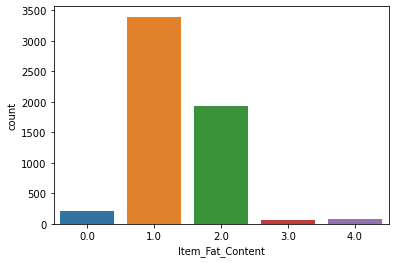

In [120]:
ax=sns.countplot(x="Item_Fat_Content", data=Big_data_test_nominal)
print(Big_data_test_nominal["Item_Fat_Content"].value_counts())

13.0    789
6.0     781
9.0     638
5.0     570
4.0     454
0.0     438
3.0     435
8.0     338
10.0    311
14.0    281
1.0     165
7.0     148
15.0    121
11.0    111
2.0      76
12.0     25
Name: Item_Type, dtype: int64


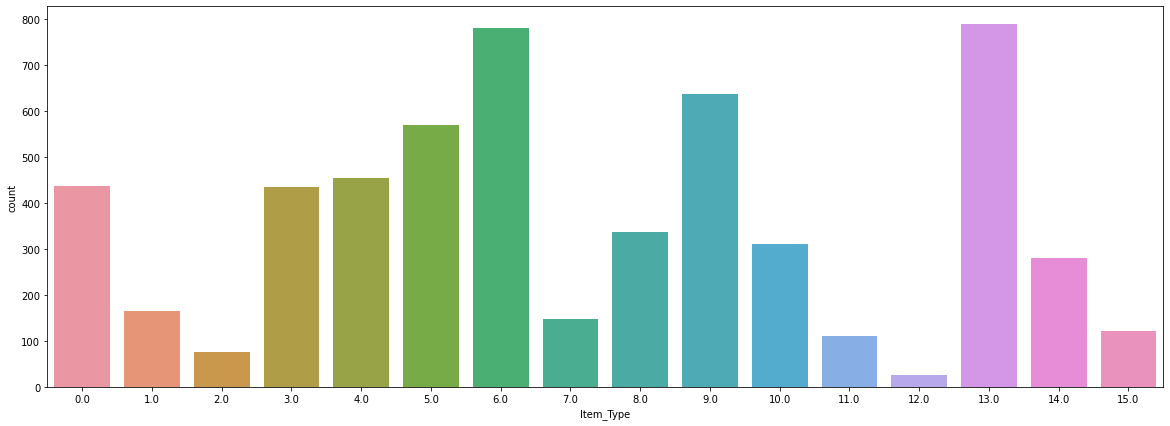

In [121]:
countplt,ax=plt.subplots(figsize=(20,7))
ax=sns.countplot(x="Item_Type", data=Big_data_test_nominal)
print(Big_data_test_nominal["Item_Type"].value_counts())

5.0    624
1.0    621
6.0    620
8.0    620
9.0    620
7.0    619
3.0    618
2.0    617
0.0    370
4.0    352
Name: Outlet_Identifier, dtype: int64


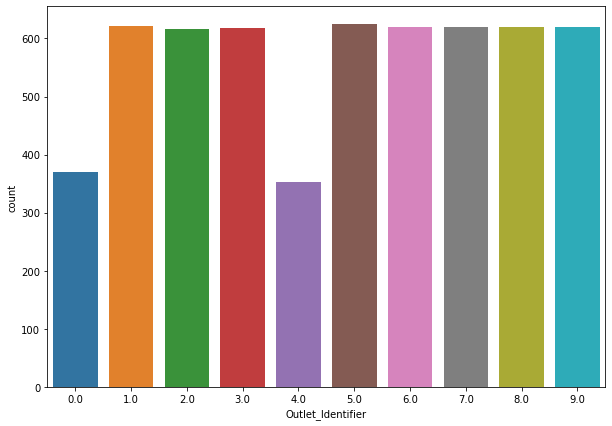

In [122]:
countplt,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(x="Outlet_Identifier", data=Big_data_test_nominal)
print(Big_data_test_nominal["Outlet_Identifier"].value_counts())

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


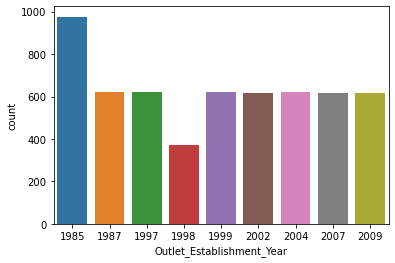

In [123]:
ax=sns.countplot(x="Outlet_Establishment_Year", data=Big_data_test_nominal)
print(Big_data_test_nominal["Outlet_Establishment_Year"].value_counts())

1.0    3468
2.0    1592
0.0     621
Name: Outlet_Size, dtype: int64


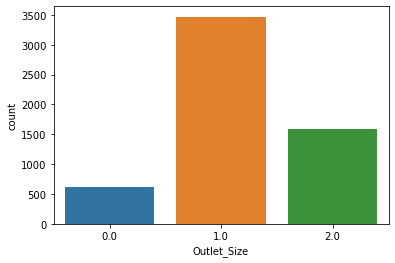

In [124]:
ax=sns.countplot(x="Outlet_Size", data=Big_data_test_nominal)
print(Big_data_test_nominal["Outlet_Size"].value_counts())

2.0    2233
1.0    1856
0.0    1592
Name: Outlet_Location_Type, dtype: int64


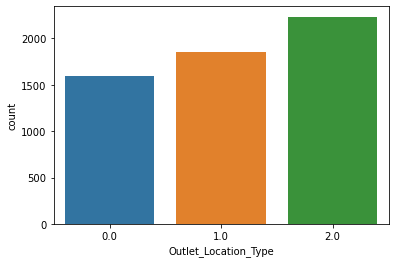

In [125]:
ax=sns.countplot(x="Outlet_Location_Type", data=Big_data_test_nominal)
print(Big_data_test_nominal["Outlet_Location_Type"].value_counts())

1.0    3717
0.0     722
3.0     624
2.0     618
Name: Outlet_Type, dtype: int64


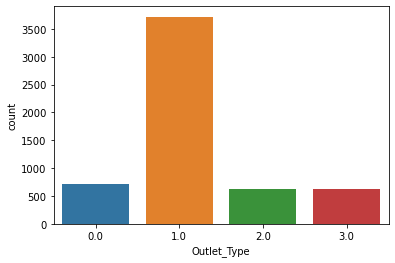

In [126]:
ax=sns.countplot(x="Outlet_Type", data=Big_data_test_nominal)
print(Big_data_test_nominal["Outlet_Type"].value_counts())

## Label Encoding String Data

In [127]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [128]:
for i in Big_data_test.columns:
    if Big_data_test[i].dtypes=="object":
        Big_data_test[i]=enc.fit_transform(Big_data_test[i].values.reshape(-1,1))

In [129]:
Big_data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,4.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


### Checking the distribution of the continous value or the float type columns 

In [130]:
Big_data_test_continuous=Big_data[["Item_Identifier","Item_Weight","Item_Visibility","Item_MRP",]].copy()

In [131]:
Big_data_test_continuous

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP
0,156.0,9.300,0.016047,249.8092
1,8.0,5.920,0.019278,48.2692
2,662.0,17.500,0.016760,141.6180
3,1121.0,19.200,0.000000,182.0950
4,1297.0,8.930,0.000000,53.8614
...,...,...,...,...
8518,370.0,6.865,0.056783,214.5218
8519,897.0,8.380,0.046982,108.1570
8520,1357.0,10.600,0.035186,85.1224
8521,681.0,7.210,0.145221,103.1332


<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

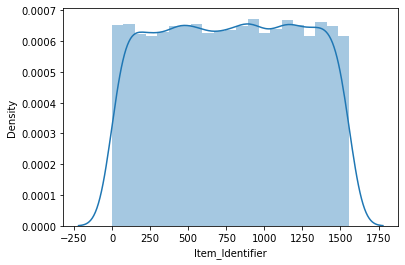

In [132]:
sns.distplot(Big_data_test_continuous['Item_Identifier'],kde=True)

From the above plot we can say that the plot is uniform

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

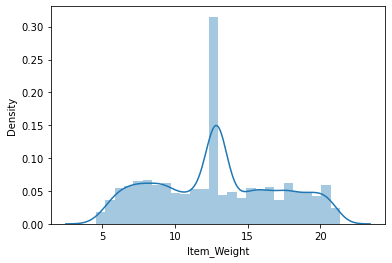

In [133]:
sns.distplot(Big_data_test_continuous['Item_Weight'],kde=True)

The distribution plot is having minimum value of 5 and maximum value of 20 with highest density at 12.5

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

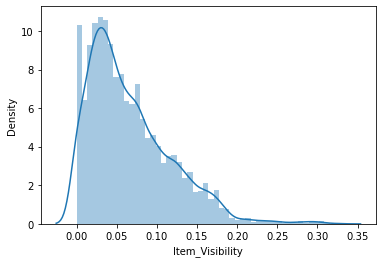

In [134]:
sns.distplot(Big_data_test_continuous['Item_Visibility'],kde=True)

The above distribution plot is positively skewed (skewness is present)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

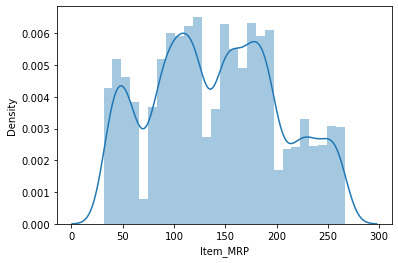

In [135]:
sns.distplot(Big_data_test_continuous['Item_MRP'],kde=True)

The above plot is uniform and multimodal with several peaks

## Bivariate Analysis

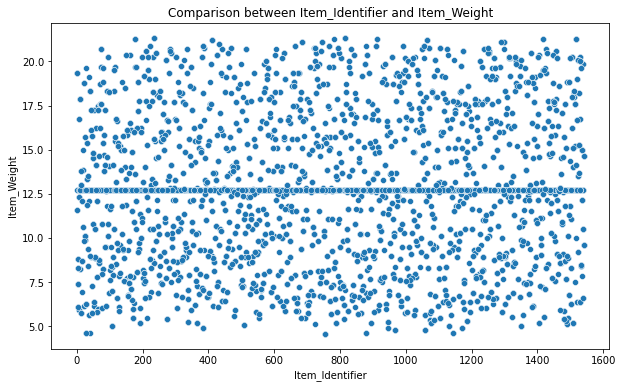

In [137]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Identifier and Item_Weight')
sns.scatterplot(Big_data_test['Item_Identifier'], Big_data_test["Item_Weight"]);

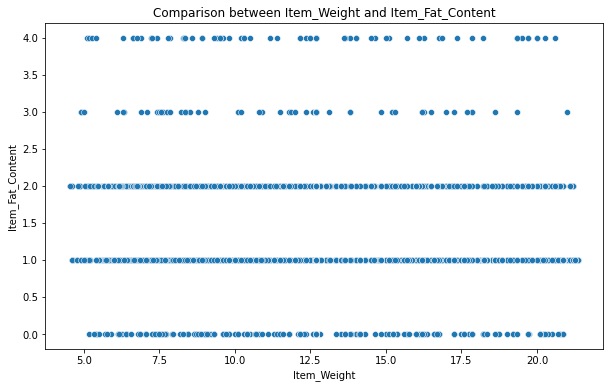

In [138]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Weight and Item_Fat_Content')
sns.scatterplot(Big_data_test['Item_Weight'], Big_data_test["Item_Fat_Content"]);

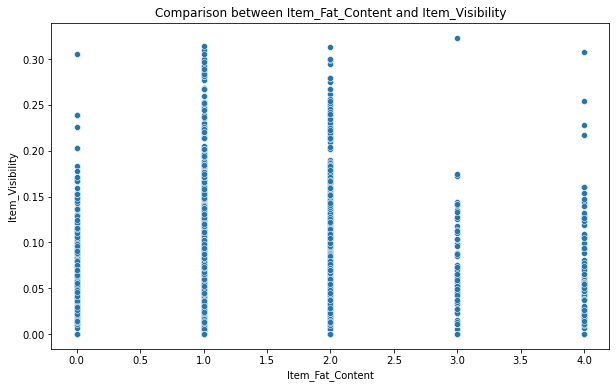

In [139]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Fat_Content and Item_Visibility')
sns.scatterplot(Big_data_test['Item_Fat_Content'], Big_data_test["Item_Visibility"]);

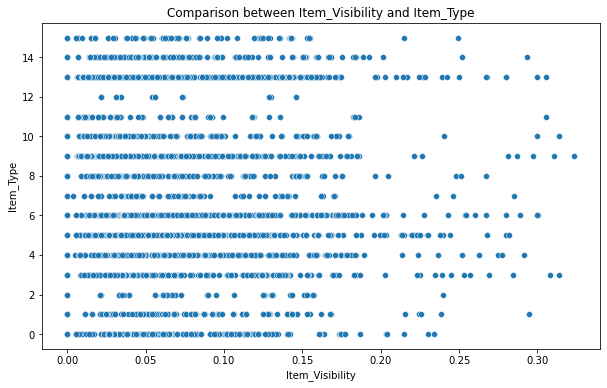

In [140]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Visibility and Item_Type')
sns.scatterplot(Big_data_test['Item_Visibility'], Big_data_test["Item_Type"]);

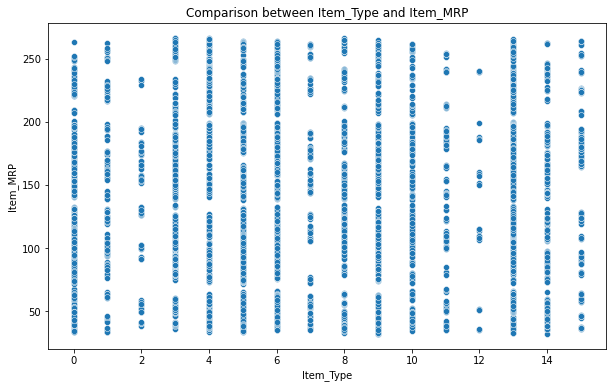

In [141]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_Type and Item_MRP')
sns.scatterplot(Big_data_test['Item_Type'], Big_data_test["Item_MRP"]);

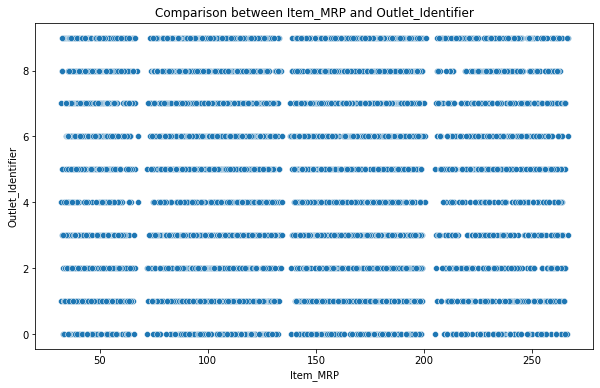

In [142]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Item_MRP and Outlet_Identifier')
sns.scatterplot(Big_data_test['Item_MRP'], Big_data_test["Outlet_Identifier"]);

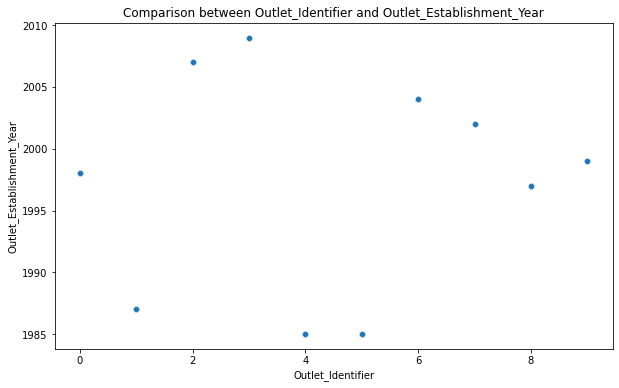

In [143]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Identifier and Outlet_Establishment_Year')
sns.scatterplot(Big_data_test['Outlet_Identifier'], Big_data_test["Outlet_Establishment_Year"]);

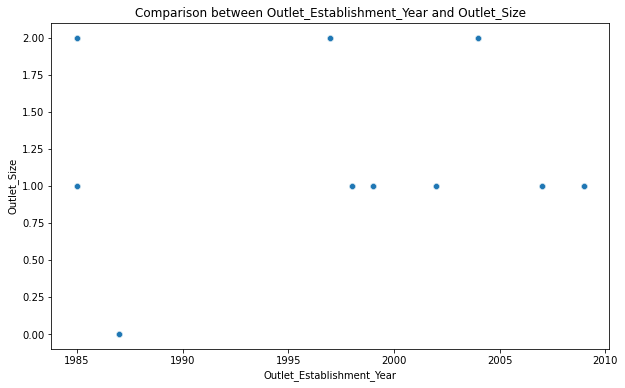

In [144]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Establishment_Year and Outlet_Size')
sns.scatterplot(Big_data_test['Outlet_Establishment_Year'], Big_data_test["Outlet_Size"]);

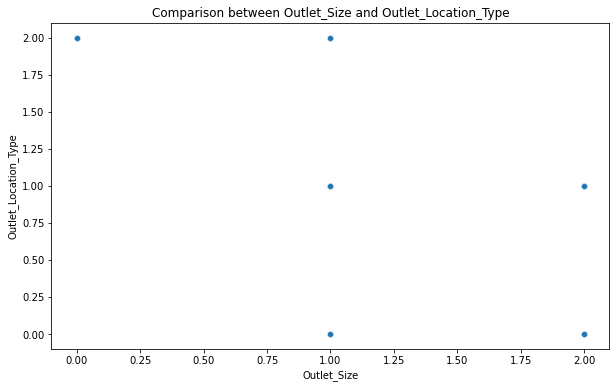

In [145]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Size and Outlet_Location_Type')
sns.scatterplot(Big_data_test['Outlet_Size'], Big_data_test["Outlet_Location_Type"]);

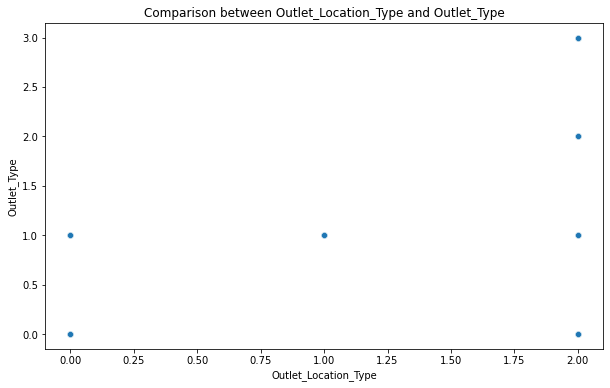

In [146]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Outlet_Location_Type and Outlet_Type')
sns.scatterplot(Big_data_test['Outlet_Location_Type'], Big_data_test["Outlet_Type"]);

From the above plots we can say that that correlation acnnot be found in any column

In [147]:
Big_data_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


<AxesSubplot:>

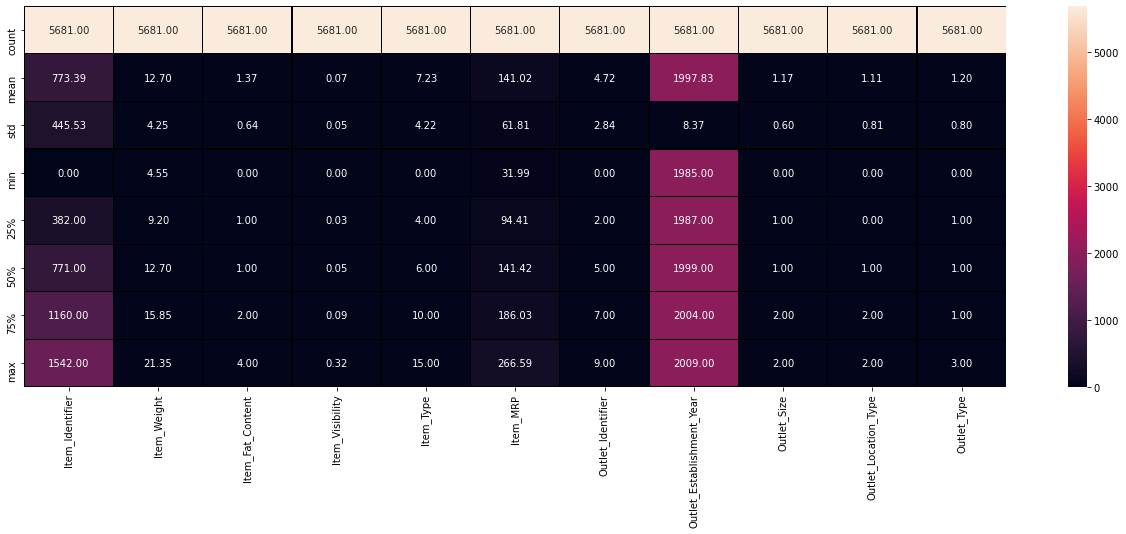

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(Big_data_test.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Outliers Check

<AxesSubplot:>

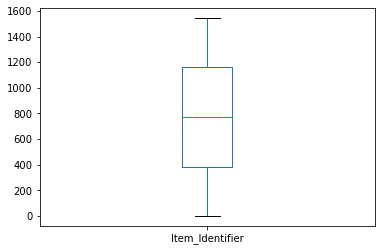

In [149]:
Big_data_test['Item_Identifier'].plot.box()

<AxesSubplot:>

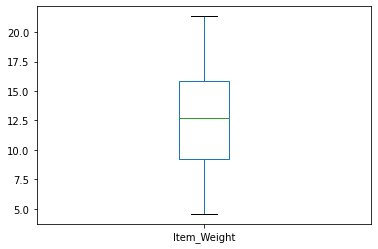

In [150]:
Big_data_test['Item_Weight'].plot.box()

<AxesSubplot:>

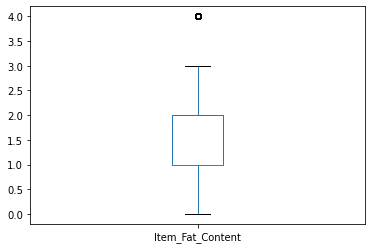

In [151]:
Big_data_test['Item_Fat_Content'].plot.box()

<AxesSubplot:>

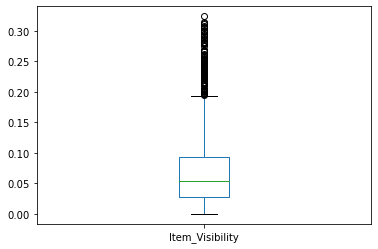

In [152]:
Big_data_test['Item_Visibility'].plot.box()

<AxesSubplot:>

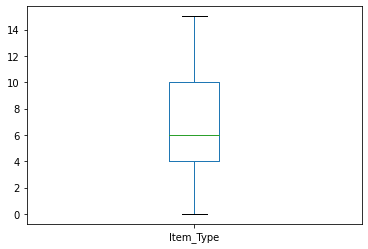

In [153]:
Big_data_test['Item_Type'].plot.box()

<AxesSubplot:>

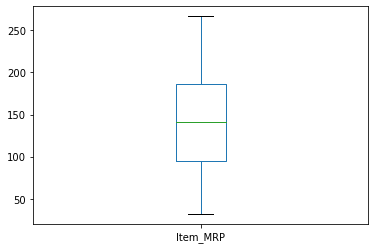

In [154]:
Big_data_test['Item_MRP'].plot.box()

<AxesSubplot:>

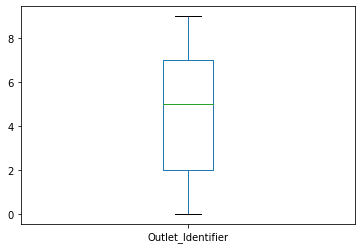

In [155]:
Big_data_test['Outlet_Identifier'].plot.box()

<AxesSubplot:>

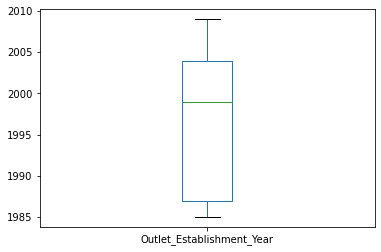

In [156]:
Big_data_test['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

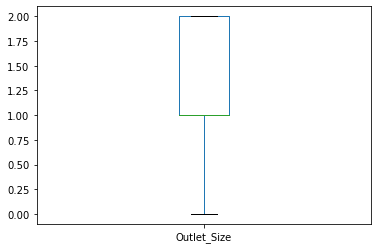

In [157]:
Big_data_test['Outlet_Size'].plot.box()

<AxesSubplot:>

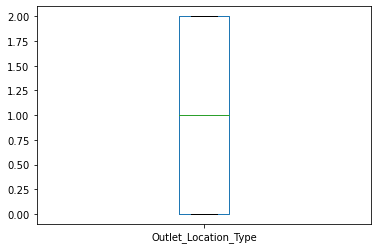

In [158]:
Big_data_test['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

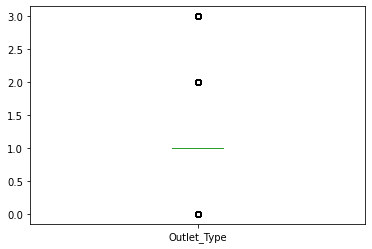

In [159]:
Big_data_test['Outlet_Type'].plot.box()

From the above graphs we can say that Item_Fat_Content, Item_Visibility, Outlet_Type have outliers

### Correlation of the columns with the target columns:

In [160]:
Big_data_test.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,0.051221,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,0.004379,-0.011657,-0.009553
Item_Weight,0.051221,1.000000,-0.042625,-0.016380,0.029657,0.045257,0.020081,0.013548,0.014735,-0.011356,0.005080
Item_Fat_Content,-0.093344,-0.042625,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,0.000421,-0.000130,0.000387
Item_Visibility,-0.063856,-0.016380,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,0.058082,-0.001146,-0.154042
Item_Type,-0.003236,0.029657,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.003729,0.000584,0.006179
Item_MRP,0.007537,0.045257,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,-0.011717,0.001754,0.003326
Outlet_Identifier,0.010162,0.020081,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.504545,-0.716113,0.099937
Outlet_Establishment_Year,0.011728,0.013548,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.193397,-0.089496,-0.122841
Outlet_Size,0.004379,0.014735,0.000421,0.058082,-0.003729,-0.011717,0.504545,0.193397,1.000000,-0.614284,-0.201538
Outlet_Location_Type,-0.011657,-0.011356,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.614284,1.000000,0.467299


<AxesSubplot:>

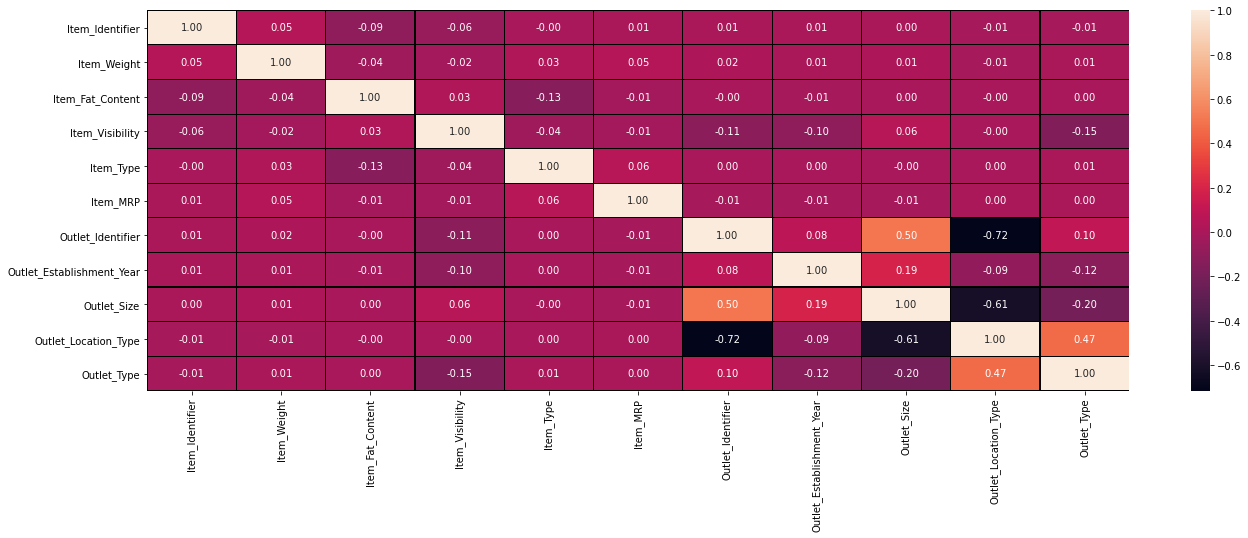

In [161]:
plt.figure(figsize=(22,7))
sns.heatmap(Big_data_test.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

From the above heatmaps we can see that:
    
Outlet_Identifier and Outlet_Location_Type have negative correlation with value -0.72

Outlet_Size and Outlet_Location_Type have negative correlation with value -0.61

and Item_MRP and Item_Outlet_Sales have positive correlation with value 0.57

rest value are between -0.5 to +0.5

## Considering Outlier Removal

In [163]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Big_data_test))
threshold=3
np.where(z>3)

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
         474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
         985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
        1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
        1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
        2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
        2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
        2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
        3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
        3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
        4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
        4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
        4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
        5157, 5168, 5277, 5290, 5323, 

In [164]:
Big_data_testnew=Big_data_test[(z<3).all(axis=1)]
Big_data_testnew

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
5,461.0,9.800000,2.0,0.063817,6.0,117.1492,8.0,1997,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [165]:
Big_data_testnew.shape

(5525, 11)

In [166]:
Big_data_test.shape

(5681, 11)

In [167]:
5681-5525

156

In [168]:
156/5525

0.02823529411764706

Here after removing outliers the remaining data is having less than 5 percent data loss, so new DataFrame is accepted for further 
 
operations

## Skewness Checking


In [169]:
Big_data_testnew.skew()

Item_Identifier             -0.004227
Item_Weight                  0.139099
Item_Fat_Content             0.275609
Item_Visibility              0.786385
Item_Type                    0.087677
Item_MRP                     0.130290
Outlet_Identifier           -0.069567
Outlet_Establishment_Year   -0.413720
Outlet_Size                 -0.080824
Outlet_Location_Type        -0.214502
Outlet_Type                  0.949783
dtype: float64

Columns having skewness are:
    
Item_Visibility with positive skewness of 0.786385

Outlet_Type with positive skewness of 0.949783

### Skewness removal using Power_Transform method

In [176]:
x_test=Big_data_testnew.iloc[:,:]
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
5,461.0,9.800000,2.0,0.063817,6.0,117.1492,8.0,1997,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [177]:
from sklearn.preprocessing import power_transform
Xtest=power_transform(x_test, method='yeo-johnson')
Xtest

array([[ 0.75137748,  1.76210404, -0.55734117, ..., -0.28514496,
        -1.38216738, -0.15121931],
       [ 1.30518204,  0.48784154, -0.55734117, ..., -0.28514496,
         1.09033574, -1.98833456],
       [ 0.1696576 , -1.30354095, -0.55734117, ..., -0.28514496,
        -0.13909017, -0.15121931],
       ...,
       [ 1.31577572, -0.59345733, -0.55734117, ..., -0.28514496,
        -0.13909017, -0.15121931],
       [-0.4737548 ,  0.64127131,  1.17117332, ..., -0.28514496,
        -0.13909017, -0.15121931],
       [ 0.52798953, -0.72032984,  1.17117332, ..., -0.28514496,
        -0.13909017, -0.15121931]])

In [178]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
xtest=SC.fit_transform(Xtest)
xtest

array([[ 0.75137748,  1.76210404, -0.55734117, ..., -0.28514496,
        -1.38216738, -0.15121931],
       [ 1.30518204,  0.48784154, -0.55734117, ..., -0.28514496,
         1.09033574, -1.98833456],
       [ 0.1696576 , -1.30354095, -0.55734117, ..., -0.28514496,
        -0.13909017, -0.15121931],
       ...,
       [ 1.31577572, -0.59345733, -0.55734117, ..., -0.28514496,
        -0.13909017, -0.15121931],
       [-0.4737548 ,  0.64127131,  1.17117332, ..., -0.28514496,
        -0.13909017, -0.15121931],
       [ 0.52798953, -0.72032984,  1.17117332, ..., -0.28514496,
        -0.13909017, -0.15121931]])

In [179]:
Predicted_y=Final_model.predict(xtest)

In [180]:
Predicted_y

array([1804.53427652, 2027.9149952 , 2154.52501434, ..., 1883.8309195 ,
       2984.94487879, 1292.00352706])

# Predicted value of Target Variable 

In [181]:
Predicted_y

array([1804.53427652, 2027.9149952 , 2154.52501434, ..., 1883.8309195 ,
       2984.94487879, 1292.00352706])

## Saving the Value of Predicted_Y

In [182]:
#from sklearn.externals import joblib
import joblib
# save the model as a object file
joblib.dump(Predicted_y,"Predicted_y_value.pkl")

['Predicted_y_value.pkl']